# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data_f = pd.read_csv('/content/weatherHistory_Train.csv')

# Display basic information about the dataset


In [3]:
print("Dataset Columns:\n", data_f.columns)
print("\nDataset Shape:", data_f.shape)
print("\nDataset Description:\n", data_f.describe())
print("\nDataset Info:")

Dataset Columns:
 Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

Dataset Shape: (12839, 12)

Dataset Description:
        Temperature (C)  Apparent Temperature (C)      Humidity  \
count     12839.000000              12838.000000  12838.000000   
mean         11.067834                  9.910201      0.742982   
std           9.964160                 11.099021      0.191611   
min         -14.088889                -22.094444      0.130000   
25%           2.805556                  0.566667      0.620000   
50%          10.588889                 10.588889      0.790000   
75%          18.380556                 18.381944      0.900000   
max          39.905556                 38.377778      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility 

# Check for missing values


In [4]:
print("\nAny missing values?", data_f.isnull().values.any())


Any missing values? True


# Percentage of missing values in each column


In [5]:
missing_percentage = round(100 * (data_f.isnull().sum() / len(data_f.index)), 2)
print("\nPercentage of missing values:\n", missing_percentage)


Percentage of missing values:
 Formatted Date              0.00
Summary                     0.00
Precip Type                 0.00
Temperature (C)             0.00
Apparent Temperature (C)    0.01
Humidity                    0.01
Wind Speed (km/h)           0.01
Wind Bearing (degrees)      0.01
Visibility (km)             0.01
Loud Cover                  0.01
Pressure (millibars)        0.01
Daily Summary               0.01
dtype: float64


# Handle missing values in the 'Precip Type' column by filling with the most frequent value ('rain')


In [6]:
data_f['Precip Type'].fillna('rain', inplace=True)
print("\nAny missing values after imputation?", data_f.isnull().values.any())



Any missing values after imputation? True


<ipython-input-6-44dfd8cab56b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_f['Precip Type'].fillna('rain', inplace=True)


# Display the first few rows of the dataset


In [7]:
print("\nFirst 5 rows of the dataset:\n", data_f.head())


First 5 rows of the dataset:
                   Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263     

# Drop non-numeric columns


In [8]:
non_numeric_columns = data_f.select_dtypes(exclude=[np.number]).columns
data_f.drop(columns=non_numeric_columns, inplace=True)
print("\nDataset after dropping non-numeric columns:\n", data_f.head())


Dataset after dropping non-numeric columns:
    Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0         9.472222                  7.388889      0.89            14.1197   
1         9.355556                  7.227778      0.86            14.2646   
2         9.377778                  9.377778      0.89             3.9284   
3         8.288889                  5.944444      0.83            14.1036   
4         8.755556                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  
0                   251.0          15.8263         0.0               1015.13  
1                   259.0          15.8263         0.0               1015.63  
2                   204.0          14.9569         0.0               1015.94  
3                   269.0          15.8263         0.0               1016.41  
4                   259.0          15.8263         0.0               1016.51  


# Create a heatmap to visualize correlations


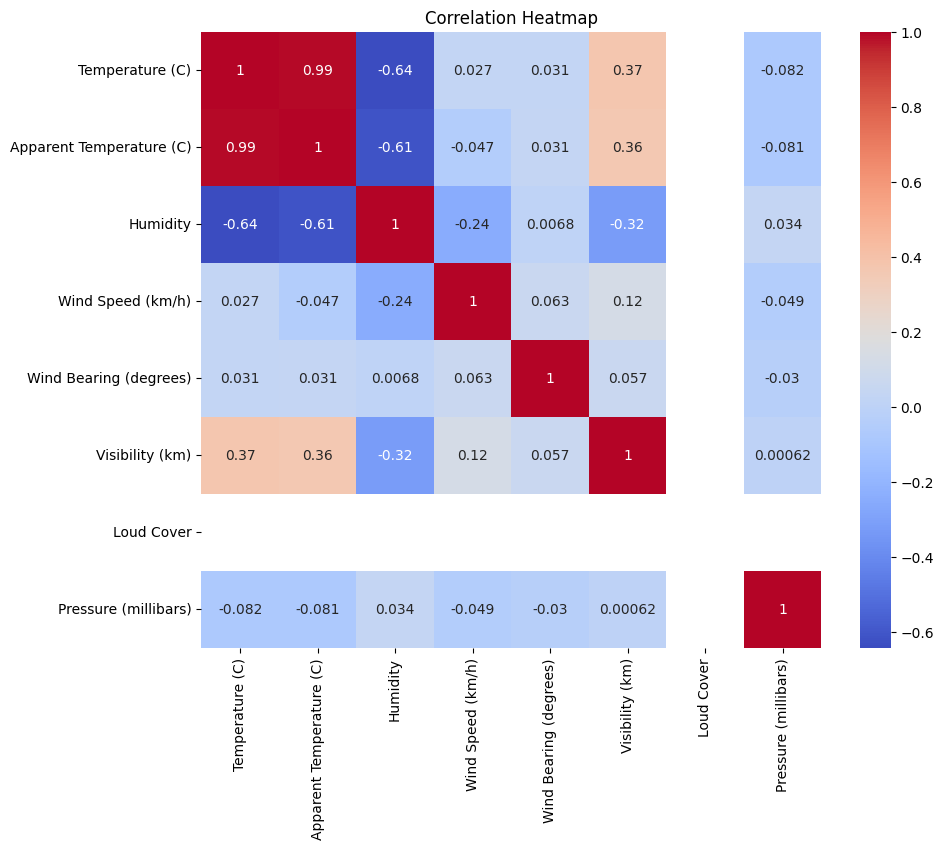

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_f.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot to visualize relationships between features


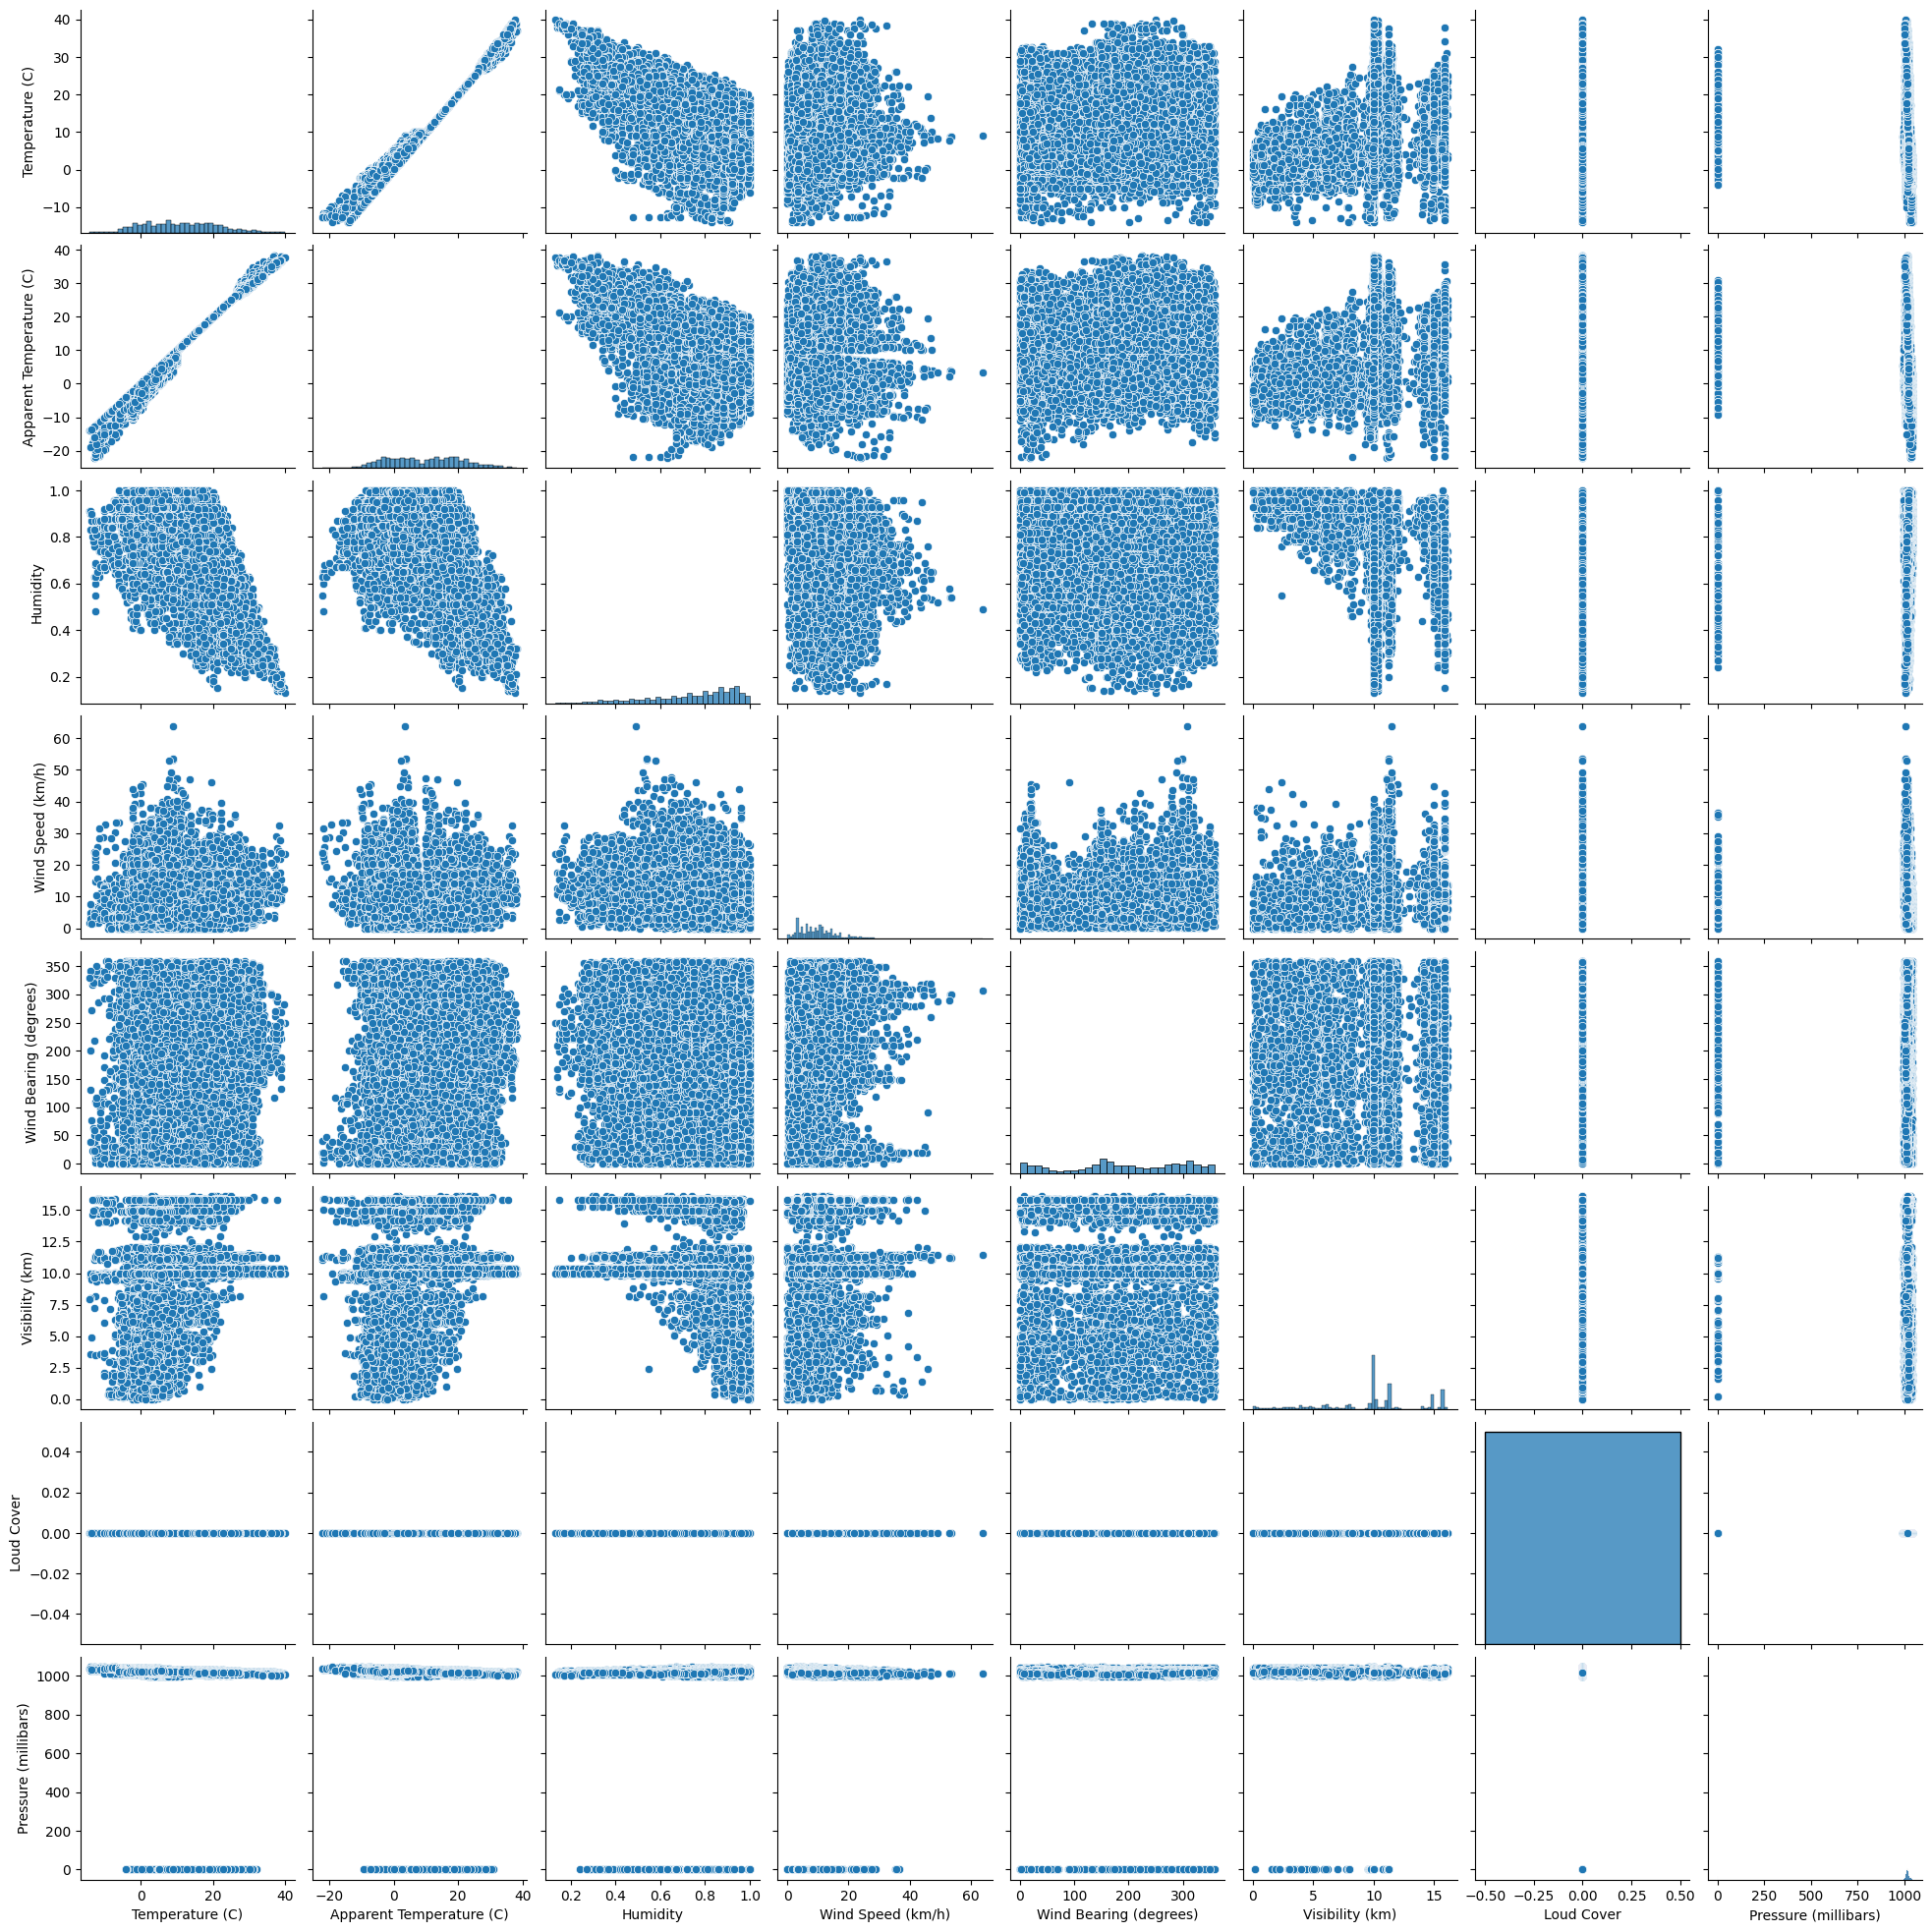

In [10]:
sns.pairplot(data_f)
plt.show()

# Split the dataset into features (X) and target (y)


In [11]:
x_train = data_f.drop(columns=["Apparent Temperature (C)"])
y_train = data_f["Apparent Temperature (C)"]

# Display the first few rows of the feature set


In [12]:
print("\nFirst 5 rows of features (X):\n", x_train.head())


First 5 rows of features (X):
    Temperature (C)  Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  \
0         9.472222      0.89            14.1197                   251.0   
1         9.355556      0.86            14.2646                   259.0   
2         9.377778      0.89             3.9284                   204.0   
3         8.288889      0.83            14.1036                   269.0   
4         8.755556      0.83            11.0446                   259.0   

   Visibility (km)  Loud Cover  Pressure (millibars)  
0          15.8263         0.0               1015.13  
1          15.8263         0.0               1015.63  
2          14.9569         0.0               1015.94  
3          15.8263         0.0               1016.41  
4          15.8263         0.0               1016.51  


# Check for missing values in training data

In [14]:
print("\nMissing values in training features (X):\n", x_train.isnull().sum())
print("\nMissing values in training target (y):\n", y_train.isnull().sum())


Missing values in training features (X):
 Temperature (C)           0
Humidity                  1
Wind Speed (km/h)         1
Wind Bearing (degrees)    1
Visibility (km)           1
Loud Cover                1
Pressure (millibars)      1
dtype: int64

Missing values in training target (y):
 1


# Drop rows with missing values


In [15]:
x_train = x_train.dropna()
y_train = y_train.loc[x_train.index]

# Initialize and train the Linear Regression model


In [16]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# Load the test dataset


In [17]:
data_test = pd.read_csv('/content/weatherHistory_Test.csv')

# Display the first few rows of the test dataset


In [18]:
print("\nFirst 5 rows of the test dataset:\n", data_test.head())


First 5 rows of the test dataset:
                   Formatted Date        Summary Precip Type  Temperature (C)  \
0  2013-05-20 06:00:00.000 +0200  Partly Cloudy        rain        13.800000   
1  2013-05-20 07:00:00.000 +0200  Partly Cloudy        rain        14.933333   
2  2013-05-20 08:00:00.000 +0200  Partly Cloudy        rain        16.872222   
3  2013-05-20 09:00:00.000 +0200  Mostly Cloudy        rain        17.800000   
4  2013-05-20 10:00:00.000 +0200  Mostly Cloudy        rain        18.933333   

   Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0      0.77            12.3809                   211.0          11.2056   
1      0.72            11.2056                   230.0          11.2056   
2      0.64            14.0714                   233.0          10.3523   
3      0.64            12.8800                   233.0          10.0464   
4      0.56            20.3987                   250.0          11.2700   

   Loud Cover  Pressure (milliba

# Check for missing values in the test dataset


In [19]:
print("\nAny missing values in the test dataset?", data_test.isnull().values.any())


Any missing values in the test dataset? True


# Percentage of missing values in the test dataset


In [20]:
missing_percentage_test = round(100 * (data_test.isnull().sum() / len(data_test.index)), 2)
print("\nPercentage of missing values in the test dataset:\n", missing_percentage_test)


Percentage of missing values in the test dataset:
 Formatted Date            0.00
Summary                   0.00
Precip Type               1.29
Temperature (C)           0.00
Humidity                  0.00
Wind Speed (km/h)         0.00
Wind Bearing (degrees)    0.00
Visibility (km)           0.00
Loud Cover                0.00
Pressure (millibars)      0.00
Daily Summary             0.00
dtype: float64


# Handle missing values in the 'Precip Type' column of the test dataset


In [21]:
data_test['Precip Type'].fillna('rain', inplace=True)
print("\nAny missing values in the test dataset after imputation?", data_test.isnull().values.any())


Any missing values in the test dataset after imputation? False


<ipython-input-21-c2402443c2a1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['Precip Type'].fillna('rain', inplace=True)


# Drop non-numeric columns from the test dataset


In [22]:
non_numeric_columns_test = data_test.select_dtypes(exclude=[np.number]).columns
data_test.drop(columns=non_numeric_columns_test, inplace=True)
print("\nTest dataset after dropping non-numeric columns:\n", data_test.head())


Test dataset after dropping non-numeric columns:
    Temperature (C)  Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  \
0        13.800000      0.77            12.3809                   211.0   
1        14.933333      0.72            11.2056                   230.0   
2        16.872222      0.64            14.0714                   233.0   
3        17.800000      0.64            12.8800                   233.0   
4        18.933333      0.56            20.3987                   250.0   

   Visibility (km)  Loud Cover  Pressure (millibars)  
0          11.2056         0.0               1013.92  
1          11.2056         0.0               1014.46  
2          10.3523         0.0               1014.91  
3          10.0464         0.0               1015.25  
4          11.2700         0.0               1015.26  


# Make predictions on the test dataset


In [23]:
predictions = model.predict(data_test)

# Save the predictions to a CSV file


In [24]:
predictions_df = pd.DataFrame(predictions, columns=['Apparent Temperature (C)'])
predictions_df.to_csv("weather_pred.csv", index=False)
print("\nPredictions saved to 'weather_pred.csv'")



Predictions saved to 'weather_pred.csv'
